### Objective: 
Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using raw data.


### 1.	Data pre-processing
Understand the data and treat missing values (Use box plot), outliers (15 points)

In [1030]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder

from scipy.stats import zscore
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [1031]:
vehicle_df = pd.read_csv("vehicle-2.csv")
vehicle_df.head(20)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107          NaN                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0           NaN   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   
15           96         55.0                 103.0         201.0   
16           89         36.0                  51.0         109.0   
17           99         41.0                  77.0         197.0   
18          104         54.0                 100.0         186.0   
19          101         56.0                 100.0         215.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   
12                  68.0                        6          152.0   
13                  58.0                       10          152.0   
14                  71.0                        5          174.0   
15                  65.0                        9          204.0   
16                  52.0                        6          118.0   
17                  69.0                        6          177.0   
18                  61.0                       10          216.0   
19                   NaN                       10          208.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
4            45.0                    19.0                        144   
5            26.0                    28.0                        169   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
9            36.0                    22.0                        146   
10           50.0                    18.0                        130   
11           54.0                    17.0                        118   
12           43.0                    19.0                        148   
13           44.0                    19.0                        144   
14           37.0                    21.0                        1

In [1032]:
vehicle_df.shape

(846, 19)

In [1033]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

### Findings:
Info shows there are some null values in various columns.

In [1034]:
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [1035]:
# Lets impute the missing values with Medians instead of Means of those columns as the Medians are less affected by the fluctuations
# in the sample, or the presense of outliers.

In [1036]:
vehicle_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [1037]:
vehicle_df.isna().apply(pd.value_counts)

compactness  circularity  distance_circularity  radius_ratio  \
False        846.0          841                   842           840   
True           NaN            5                     4             6   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   844                    846.0            845   
True                      2                      NaN              1   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            845                     843                      846.0   
True               1                       3                        NaN   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              843                844                        844   
True                 3                  2                          2   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          842             840               845   
True                             4               6                 1   

       skewness_about.2  hollows_ratio  class  
False               845          846.0  846.0  
True                  1            NaN    NaN

### Identifying and Handling Missing Values

In [1038]:

#imputed_vehicle_df = imputed_vehicle_df.apply(lambda x: x.fillna(x.median()),axis=0)

imputed_vehicle_df = vehicle_df
df_columns = imputed_vehicle_df.columns

for colname in df_columns:
    if(imputed_vehicle_df[colname].isnull().any()):
        imputed_vehicle_df[colname].fillna(imputed_vehicle_df[colname].median(), inplace= True)


# Recheck for missing values
imputed_vehicle_df.isna().apply(pd.value_counts)

compactness  circularity  distance_circularity  radius_ratio  \
False          846          846                   846           846   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
False                   846                      846            846   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
False            846                     846                        846   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
False              846                846                        846   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
False                          846             846               846   

       skewness_about.2  hollows_ratio  class  
False               846            846    846

In [1039]:
imputed_vehicle_df.head(20)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107         44.0                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0         167.0   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   
15           96         55.0                 103.0         201.0   
16           89         36.0                  51.0         109.0   
17           99         41.0                  77.0         197.0   
18          104         54.0                 100.0         186.0   
19          101         56.0                 100.0         215.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   
12                  68.0                        6          152.0   
13                  58.0                       10          152.0   
14                  71.0                        5          174.0   
15                  65.0                        9          204.0   
16                  52.0                        6          118.0   
17                  69.0                        6          177.0   
18                  61.0                       10          216.0   
19                  61.0                       10          208.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
4            45.0                    19.0                        144   
5            26.0                    28.0                        169   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
9            36.0                    22.0                        146   
10           50.0                    18.0                        130   
11           54.0                    17.0                        118   
12           43.0                    19.0                        148   
13           44.0                    19.0                        144   
14           37.0                    21.0                        1

In [1040]:
imputed_vehicle_df['class'] = LabelEncoder().fit_transform(imputed_vehicle_df['class'])
y_df = imputed_vehicle_df[['class']]
X_df = imputed_vehicle_df.drop(columns=['class'], axis=1)

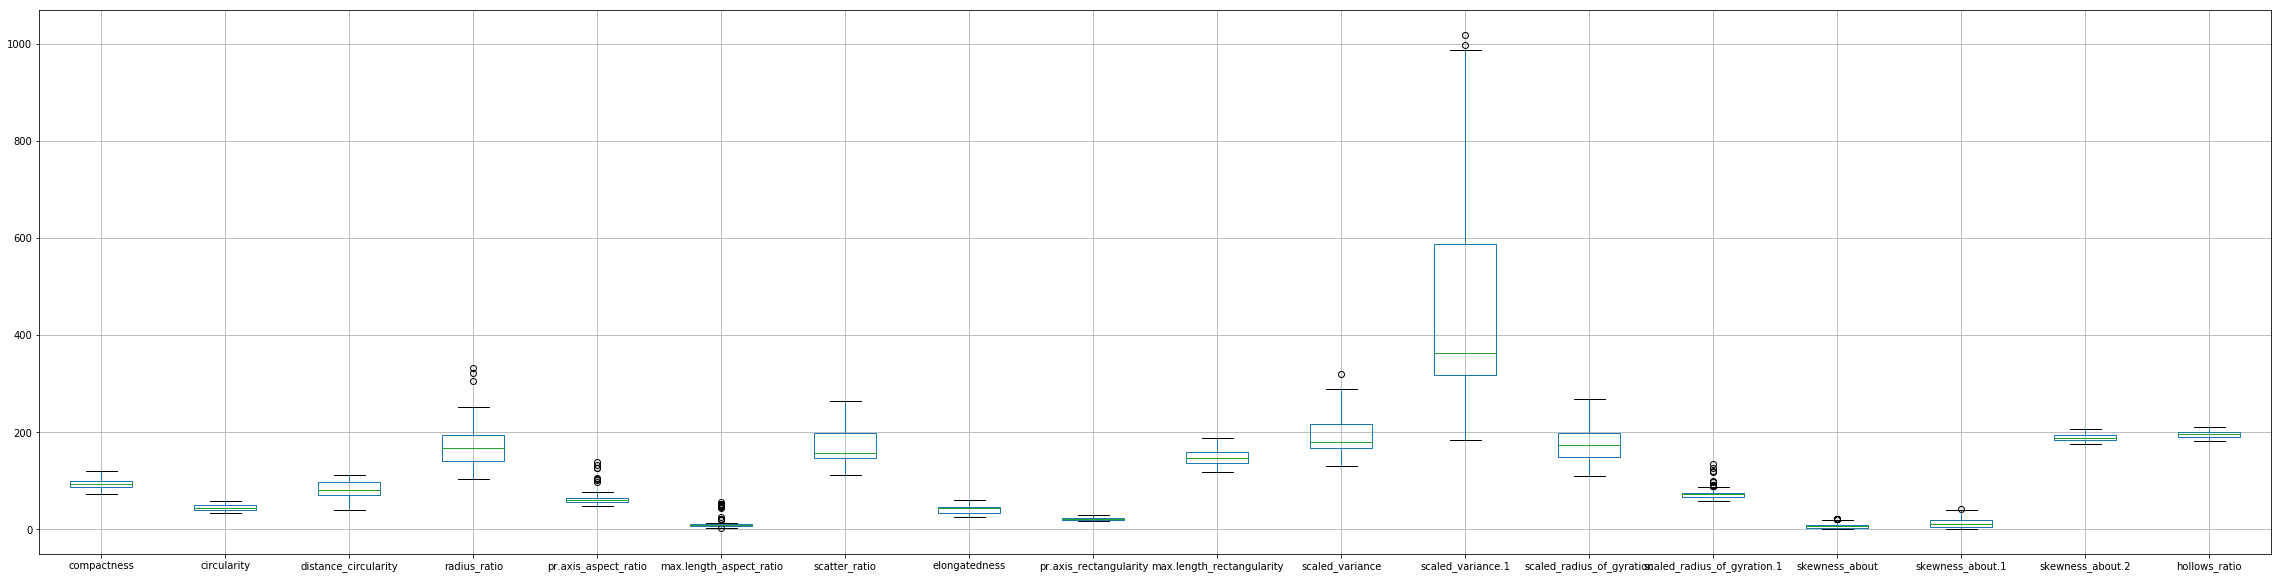

In [1041]:
# Checking for outliers
X_df.boxplot(figsize=(40, 10))

### Box Plot Findings: 
There are outliers in few columns like:
radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio,scaled_variance, scaled_radius_of_gyration.1, skewness_about, skewness_about.1


### Identifying and Handling Outliers

In [1042]:
# Detecting and Treating Outliers
# Look for Capping for imputing outliers

x_df_imputed_outliers = X_df
all_colnames = x_df_imputed_outliers.columns

for colname in all_colnames:
    col_median , col_std = x_df_imputed_outliers[colname].median() , x_df_imputed_outliers[colname].std()
    print("COLUMN: ", colname, "median: ", col_median, "std: ", col_std)
    outliers = (x_df_imputed_outliers[colname] - col_median).abs() > 2*col_std
    outliers_index = x_df_imputed_outliers[outliers].index
    # For Project Report: Outputing the Record numbers where outliers were imputed 
    print("Outliers Record Numbers:  ", x_df_imputed_outliers[outliers].index) 
    x_df_imputed_outliers[colname][outliers_index] = col_median
    
    
X_df = x_df_imputed_outliers

COLUMN:  compactness median:  93.0 std:  8.234474253334263
Outliers Record Numbers:   Int64Index([ 44,  73,  85, 155, 167, 202, 255, 283, 321, 346, 428, 505, 515,
            554, 562, 661, 667, 683, 705, 733, 761, 778, 788, 797, 835],
           dtype='int64')
COLUMN:  circularity median:  44.0 std:  6.134272494223796
Outliers Record Numbers:   Int64Index([ 71,  85, 217, 251, 259, 274, 321, 332, 334, 389, 447, 458, 486,
            675, 687, 733, 827, 835],
           dtype='int64')
COLUMN:  distance_circularity median:  80.0 std:  15.741568977043652
Outliers Record Numbers:   Int64Index([230, 231, 506, 612, 655], dtype='int64')
COLUMN:  radius_ratio median:  167.0 std:  33.40135558096855
Outliers Record Numbers:   Int64Index([37, 100, 135, 291, 388, 444, 556, 620, 687, 706, 721], dtype='int64')
COLUMN:  pr.axis_aspect_ratio median:  61.0 std:  7.882187562823245
Outliers Record Numbers:   Int64Index([4, 37, 100, 135, 291, 388, 523, 706], dtype='int64')
COLUMN:  max.length_aspect_ratio

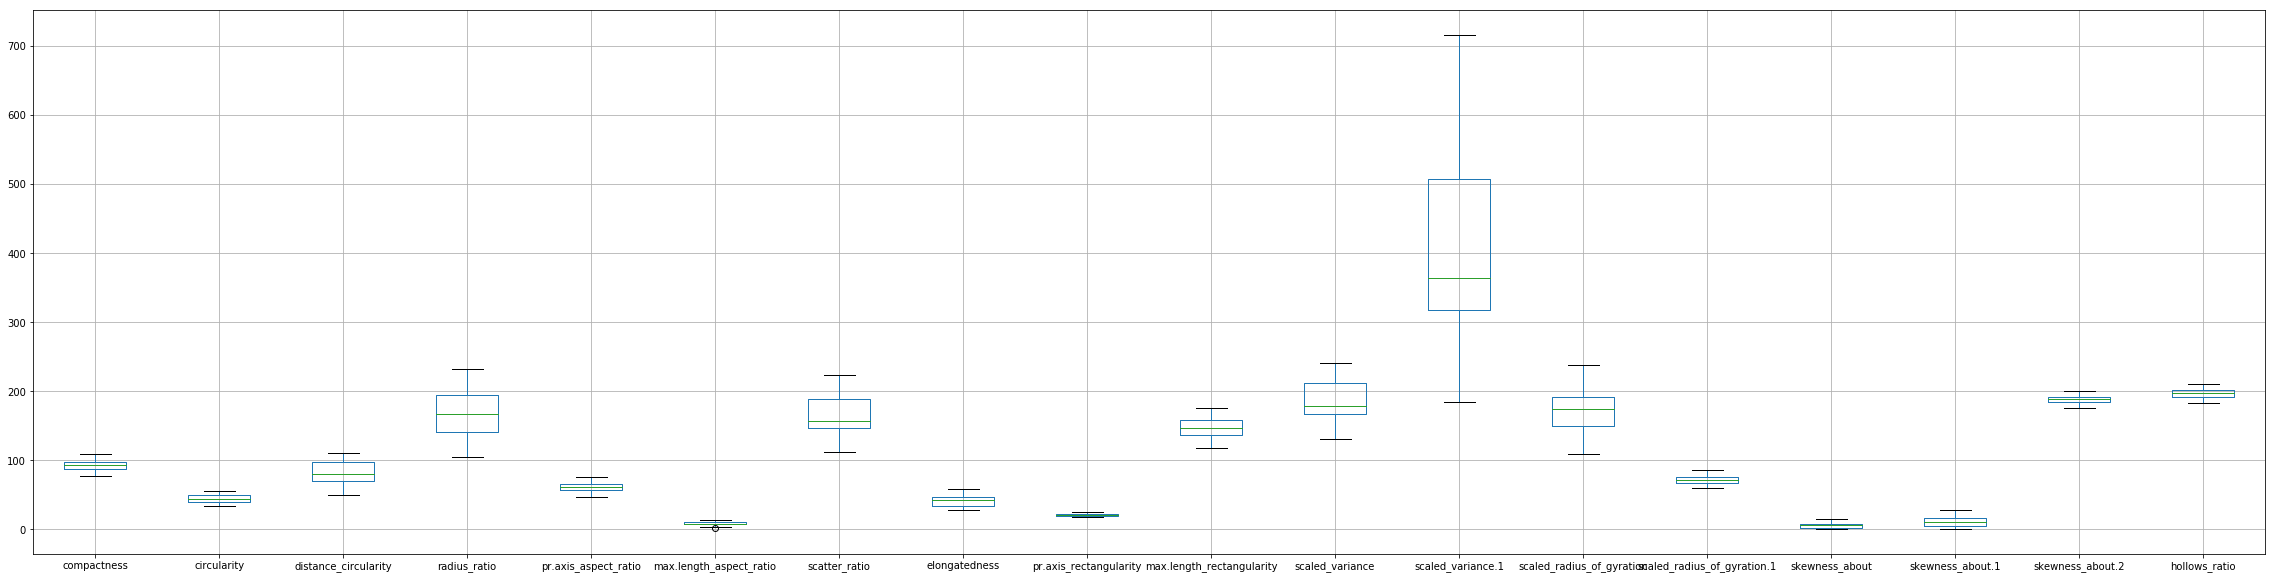

In [1043]:
X_df.boxplot(figsize=(40, 10))

### Findings
Boxplot after treating outlier looks much better with very less new outliers popping out. Treating the oultiers with the median of the column will make the distribution of that feature/column sharper and create more outliers. However we will not bother about the ones created now, as each time outliers are fixed the distribution curve will get sharper and create more outliers.

### 2.	Understanding the attributes
Find relationships between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (15 points)

In [1044]:
X_corr = imputed_vehicle_df.corr()

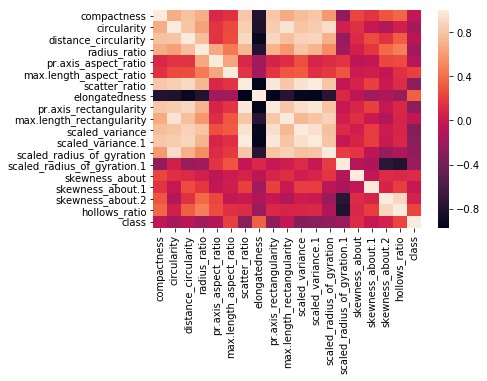

In [1045]:
hp = sns.heatmap(X_corr)

### Findings: 
Many attributes have strong correlation among them. Both positive strong correlation and negative correlation

In [1046]:
imputed_vehicle_df.head(20)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107         44.0                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0         167.0   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   
15           96         55.0                 103.0         201.0   
16           89         36.0                  51.0         109.0   
17           99         41.0                  77.0         197.0   
18          104         54.0                 100.0         186.0   
19          101         56.0                 100.0         215.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   
12                  68.0                        6          152.0   
13                  58.0                       10          152.0   
14                  71.0                        5          174.0   
15                  65.0                        9          204.0   
16                  52.0                        6          118.0   
17                  69.0                        6          177.0   
18                  61.0                       10          216.0   
19                  61.0                       10          208.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
4            45.0                    19.0                        144   
5            26.0                    28.0                        169   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
9            36.0                    22.0                        146   
10           50.0                    18.0                        130   
11           54.0                    17.0                        118   
12           43.0                    19.0                        148   
13           44.0                    19.0                        144   
14           37.0                    21.0                        1

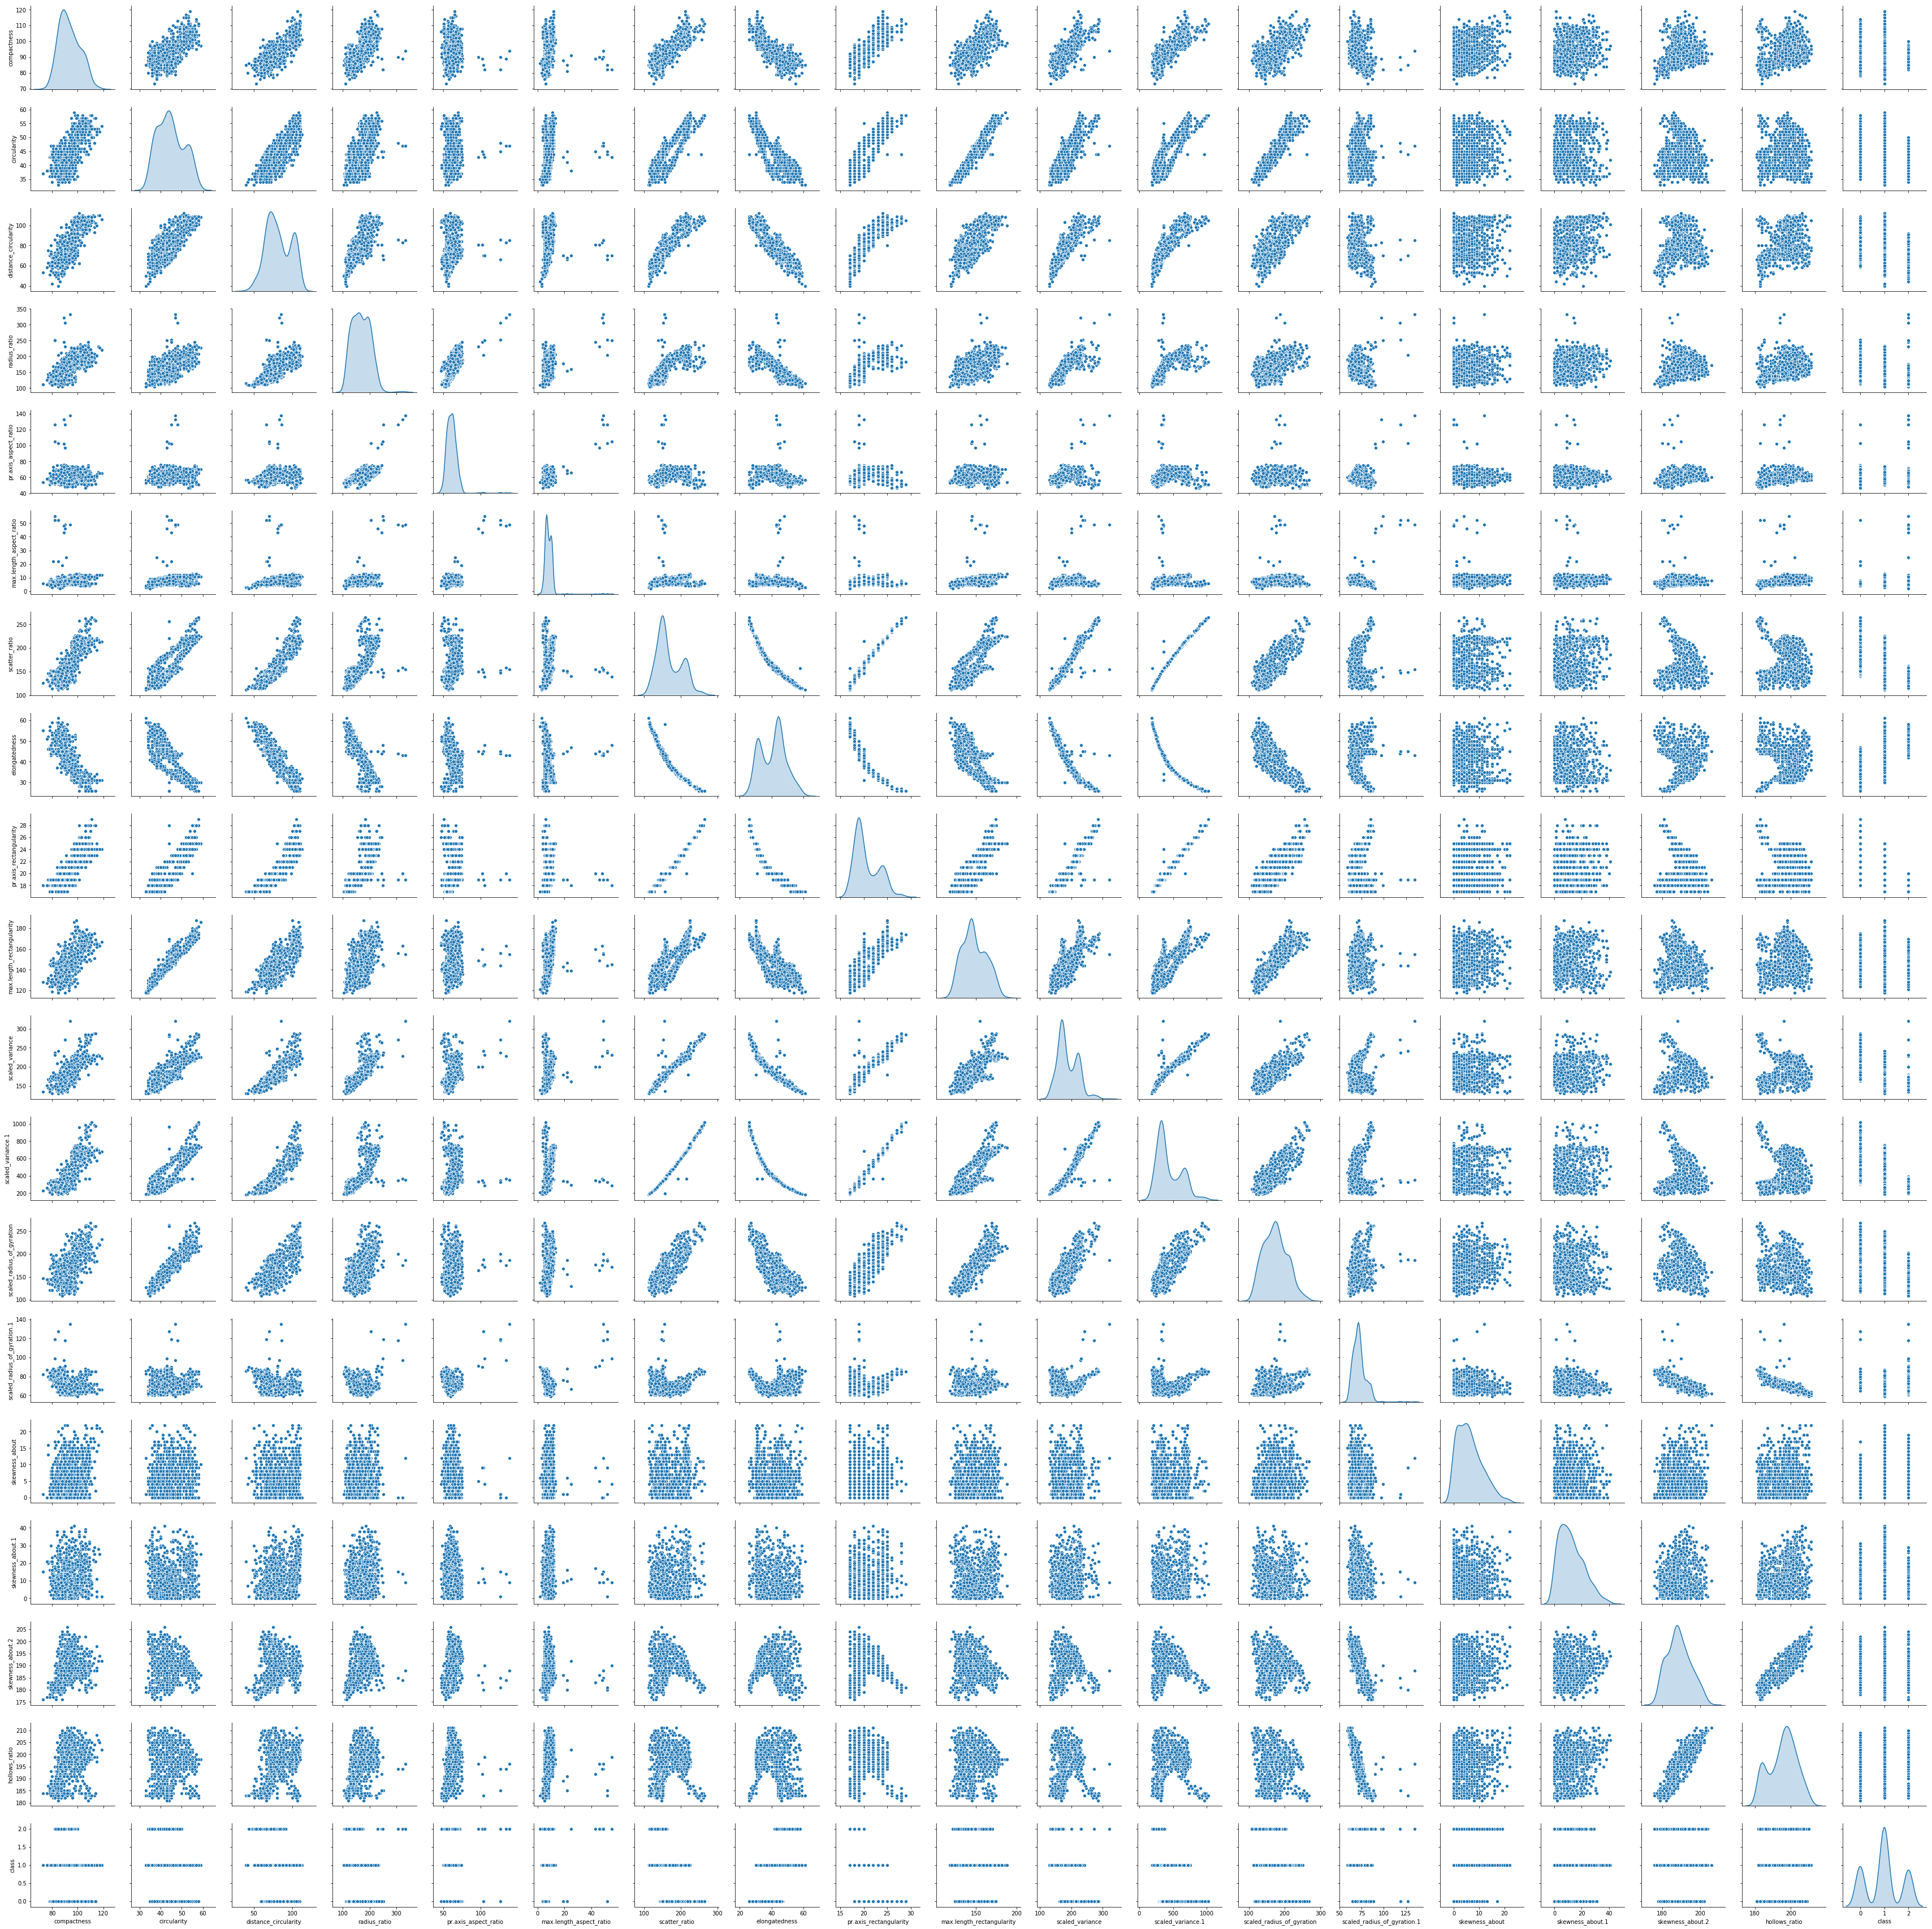

In [1047]:
sns.pairplot(imputed_vehicle_df, diag_kind='kde')

### Findings
After observing Correlation Heatmap and Pairplot, Many features are strongly correlated to each other. Both positive correlation and negative correlation. 

Positive Correlation:
distance_circularity, compactness , circularity , distance_circularity, scatter_ratio share positive correlation with each other
Negative Correlation:
elongatedness shares negative correlation with all the above variables. And likewise other variables.

Also looking at the covariance matrix further, we can make the correlation numbers. Few are very strongly related, even more than 90%.
Also keeping the target variable in the pairplot analysis, helps to know which features are able to classify without overlapping.

Instead of dropping the independent variables directly, lets do a PCA and check the % of variance explained and later drop.


### 3.	Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 20 points

In [1048]:
XScaled_df = X_df.apply(zscore) 
XScaled_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.239969     0.592237              0.049363      0.331454   
1    -0.290786    -0.605587              0.114009     -0.850362   
2     1.434168     0.934472              1.536217      1.321623   
3    -0.025408    -0.605587             -0.015283     -0.275425   
4    -1.086918    -0.092234             -0.791033      1.193860   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.933135                 0.910934      -0.110268   
1             -0.740596                 0.428675      -0.553194   
2              0.863642                 0.910934       1.422935   
3              0.328896                 0.428675      -0.723550   
4             -0.027601                -0.053584      -0.553194   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.111829               -0.162734                   0.866690   
1       0.517287               -0.591622                  -0.306696   
2      -1.239700                1.123930                   0.793353   
3       0.652440               -0.591622                  -0.306696   
4       0.517287               -0.591622                  -0.233360   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.346419          -0.208066                   0.406165   
1        -0.568583          -0.548590                  -0.481686   
2         1.393862           1.571003                   1.635497   
3        -0.938855          -0.694530                  -1.540278   
4         2.060352          -0.583338                   0.542757   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.294922        0.067669          0.658888   
1                     0.043618        0.814381          0.381772   
2                     0.212888        2.058901         -0.311019   
3                    -1.479814        0.067669         -0.172461   
4                    -0.041017        0.814381         -0.033902   

   skewness_about.2  hollows_ratio  
0         -0.243194       0.126517  
1          0.119347       0.411938  
2         -0.061923      -0.016194  
3          1.932056       1.553624  
4         -1.512090      -1.871434

In [1049]:
covMatrix = np.cov(XScaled_df,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.63791866  0.75254691  0.71319773  0.22162287  0.48609941
   0.72599025 -0.73252516  0.74759274  0.63164197  0.69322594  0.68859802
   0.51280107 -0.24179335  0.15587231  0.1419538   0.35073131  0.35565406]
 [ 0.63791866  1.00118343  0.7515931   0.60956005  0.2019376   0.56109147
   0.77256604 -0.76559246  0.78636011  0.91460555  0.74848044  0.71348031
   0.88784089  0.06113537  0.14551657  0.01269454  0.00500068  0.06309562]
 [ 0.75254691  0.7515931   1.00118343  0.7941815   0.23902501  0.65144183
   0.84735433 -0.86841837  0.86846186  0.7300749   0.84815889  0.80122081
   0.66007288 -0.19471328  0.10871867  0.21548224  0.2134508   0.28303983]
 [ 0.71319773  0.60956005  0.7941815   1.00118343  0.64408855  0.48503696
   0.79419442 -0.83277565  0.78927939  0.53748117  0.83288331  0.75972856
   0.53233022 -0.38736718  0.03710994  0.14350742  0.49296229  0.47189757]
 [ 0.22162287  0.2019376   0.23902501  0.64408855  1.00118343  0.15406479
   0.29910087 -0.35850019  0.26854

In [1050]:
covMatrix.shape

(18, 18)

In [1051]:
pca = PCA(n_components=18)
pca.fit(XScaled_df)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [1052]:
print("Eigen Values: ", pca.explained_variance_)

Eigen Values:  [9.51374169 2.90877294 1.12334879 1.09716224 0.88160143 0.60184024
 0.46633206 0.33878299 0.21347206 0.18457403 0.1729867  0.15506606
 0.09515347 0.07639009 0.05879273 0.05377787 0.04577513 0.03373126]


In [1053]:
print("Eigen Vectors: \n", pca.components_)

Eigen Vectors: 
 [[-2.61282122e-01 -2.73793374e-01 -2.96753217e-01 -2.82861788e-01
  -1.24440109e-01 -2.23365227e-01 -3.07919968e-01  3.06109412e-01
  -3.07442200e-01 -2.57920568e-01 -3.03929542e-01 -2.93526811e-01
  -2.49913751e-01  7.48372584e-02 -3.75068569e-02 -5.44207643e-02
  -9.62633327e-02 -1.16332036e-01]
 [-5.33494437e-02  2.03429215e-01  2.49289570e-02 -1.73759593e-01
  -2.53519731e-01 -2.76243701e-02  4.88365654e-02 -3.16324397e-02
   7.16681690e-02  2.08592312e-01  3.35539559e-02  2.41002874e-02
   2.50459033e-01  5.10055432e-01  3.05667114e-02 -2.72062811e-02
  -4.96467792e-01 -4.84913131e-01]
 [-8.64479830e-02 -1.68860343e-01  2.45488214e-02  1.24667822e-01
   1.77562772e-01 -1.25111041e-01  9.12116185e-02 -1.16571007e-01
   8.34027516e-02 -1.97803711e-01  1.34475176e-01  1.04474587e-01
  -1.68217895e-01  1.44599157e-01 -6.93897171e-01  4.92952028e-01
  -8.53836752e-02 -1.50685690e-01]
 [ 1.12714813e-01 -1.06113824e-01  1.19607706e-01 -1.66618631e-01
  -5.13825288e-01  1

In [1054]:
print("% of variation explained by each Eigen Vector : \n", pca.explained_variance_ratio_)

% of variation explained by each Eigen Vector : 
 [0.52791645 0.16140748 0.0623345  0.06088141 0.04891996 0.03339605
 0.02587671 0.01879903 0.01184554 0.01024199 0.00959901 0.0086046
 0.00528006 0.00423888 0.0032624  0.00298413 0.00254006 0.00187174]


[Text(0, 0.5, '% of Variation Explained'), Text(0.5, 0, 'Eigen Values')]

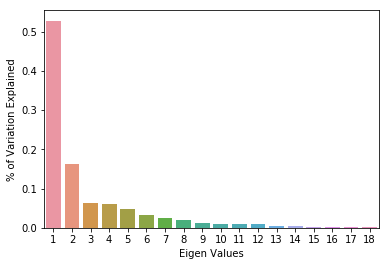

In [1055]:
vr_plt = sns.barplot(x=list(range(1,19)), y=pca.explained_variance_ratio_)
vr_plt.set(xlabel='Eigen Values', ylabel='% of Variation Explained' )

[Text(0, 0.5, 'Cummulative Sum of Variation Explained %'),
 Text(0.5, 0, 'Eigen Values')]

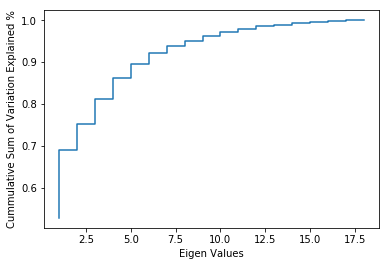

In [1056]:
ln_plt = sns.lineplot(list(range(1,19)), np.cumsum(pca.explained_variance_ratio_), drawstyle='steps-pre')
ln_plt.set(xlabel='Eigen Values', ylabel='Cummulative Sum of Variation Explained %' )

In [1057]:
np.cumsum(pca.explained_variance_ratio_)

array([0.52791645, 0.68932393, 0.75165843, 0.81253984, 0.8614598 ,
       0.89485585, 0.92073256, 0.93953159, 0.95137713, 0.96161913,
       0.97121814, 0.97982274, 0.98510279, 0.98934167, 0.99260407,
       0.9955882 , 0.99812826, 1.        ])

### Findings:
Cummlative sum of first NINE Principal components account to total of 95.13% (more than 95%) of variance. Hence, dropping rest, and doing PCA only with 9. So, with just 9 principal components out of 18 we can explain over 95% of the variation in the original data.

In [1058]:
pca9 = PCA(n_components=9)
pca9.fit(XScaled_df)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [1059]:
print(pca9.explained_variance_ratio_)

[0.52791645 0.16140748 0.0623345  0.06088141 0.04891996 0.03339605
 0.02587671 0.01879903 0.01184554]


In [1060]:
print(pca9.components_)

[[-0.26128212 -0.27379337 -0.29675322 -0.28286179 -0.12444011 -0.22336523
  -0.30791997  0.30610941 -0.3074422  -0.25792057 -0.30392954 -0.29352681
  -0.24991375  0.07483726 -0.03750686 -0.05442076 -0.09626333 -0.11633204]
 [-0.05334944  0.20342922  0.02492896 -0.17375959 -0.25351973 -0.02762437
   0.04883657 -0.03163244  0.07166817  0.20859231  0.03355396  0.02410029
   0.25045903  0.51005543  0.03056671 -0.02720628 -0.49646779 -0.48491313]
 [-0.08644798 -0.16886034  0.02454882  0.12466782  0.17756277 -0.12511104
   0.09121162 -0.11657101  0.08340275 -0.19780371  0.13447518  0.10447459
  -0.16821789  0.14459916 -0.69389717  0.49295203 -0.08538368 -0.15068569]
 [ 0.11271481 -0.10611382  0.11960771 -0.16661863 -0.51382529  0.19797018
   0.02420676  0.0319536   0.04707172 -0.04236438 -0.0218546   0.02686083
  -0.14531422 -0.09764419  0.32293533  0.69072481 -0.04106001  0.10108263]
 [ 0.02755686 -0.06034478 -0.04640071  0.20164512  0.43136375 -0.45642091
   0.00636115 -0.07978365 -0.00279

In [1061]:
Xpca9 = pca9.transform(XScaled_df)

In [1062]:
Xpca9.shape

(846, 9)

In [1063]:
# Number of the features/independent variables reduced from 18 columns to 7 !! 

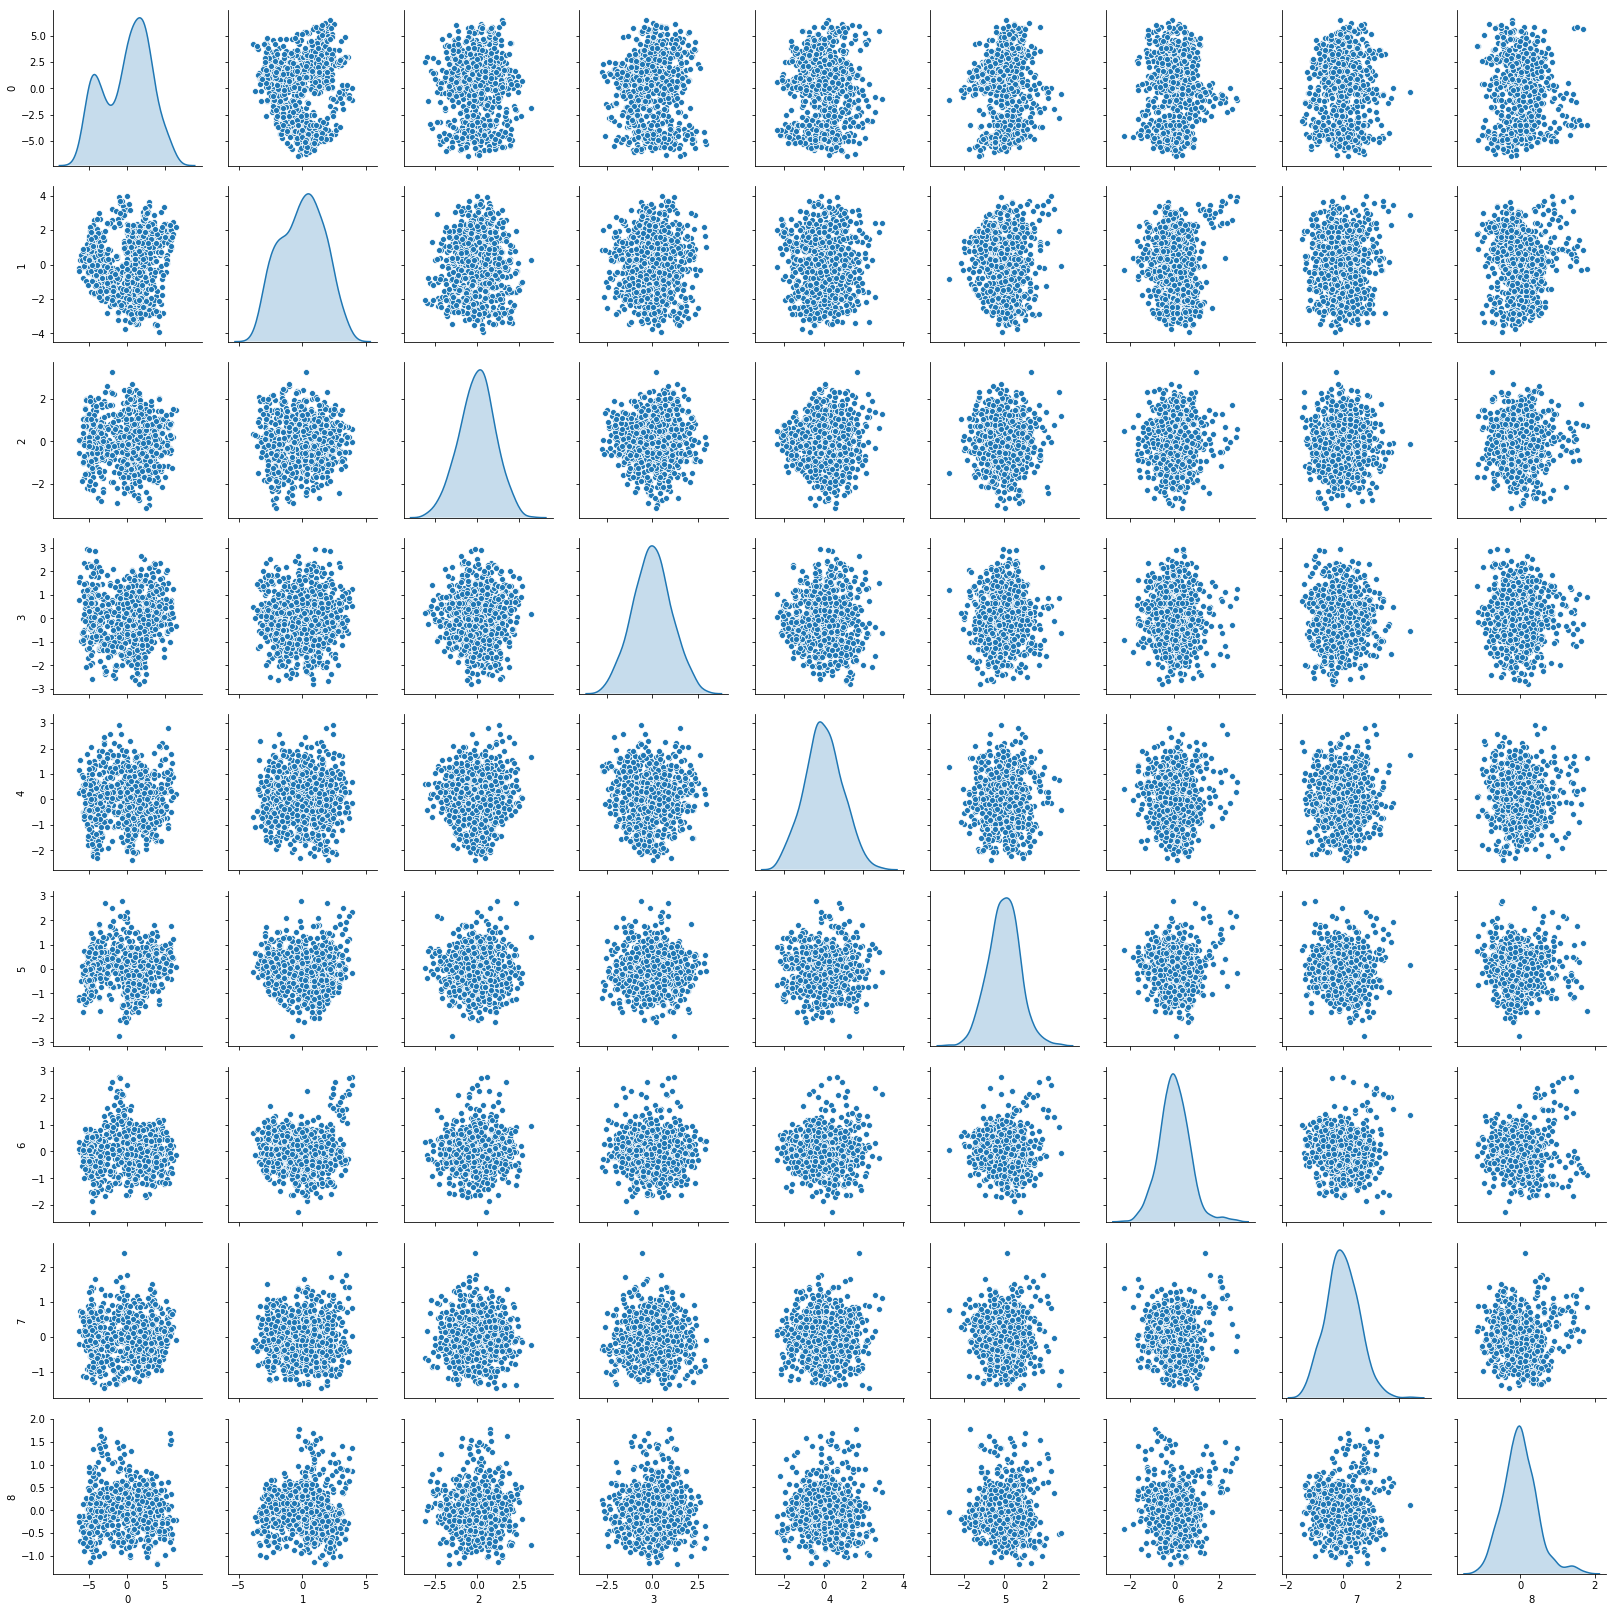

In [1064]:
sns.pairplot(pd.DataFrame(Xpca9), diag_kind='kde')

### Findings:
Pairplot of the selected 9 principal components shows all the plots with clouds in scatter plots off diagonals, depicting that PCA was successful in removing the colinearlity between the independent variables by using Eigen Vectors; trying to make the indepedent variables as much as independent and not correlated to each other.

### 4.	Use Support vector machines to classify the class(y) of vehicles and find the difference of accuracy with and without PCA on predictors(X). 20 points

In [1065]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import time

### Iteration - 1 : 70-30 Train Test Split with and without PCA for SVM 

### SVM without PCA

In [1066]:
# Fit the SVM Model without PCA
X_train, X_test, y_train, y_test = train_test_split(XScaled_df, y_df, test_size=0.3, random_state=1)

svc_clf = SVC()
#print("SCV initialization done....")

#start_time = time.clock()
svc_clf.fit(X_train, y_train)
#end_time = time.clock()
#fit_time = end_time - start_time
#print("SVC fit done in ", fit_time)

print("SVM - 18 features without PCA Estimator: ", svc_clf)

train_score = svc_clf.score(X_train, y_train)
print("SVC Train Score: ", train_score)

test_score = svc_clf.score(X_test, y_test)
print("SVC Test Score: ", test_score)


y_pred = svc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n", cf_matrix)

print("\nF1 Score", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report \n", classification_report(y_test, y_pred))

SVM - 18 features without PCA Estimator:  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
SVC Train Score:  0.981418918918919
SVC Test Score:  0.9488188976377953

Confusion Matrix: 
 [[ 58   1   0]
 [  1 128   4]
 [  4   3  55]]

F1 Score 0.9486024247531442

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        59
           1       0.97      0.96      0.97       133
           2       0.93      0.89      0.91        62

   micro avg       0.95      0.95      0.95       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.95      0.95      0.95       254



### SVM with PCA

In [1067]:
X_train, X_test, y_train, y_test = train_test_split(Xpca9, y_df, test_size=0.3, random_state=1)

svc_clf_pca = SVC()
#print("SCV-PCA initialization done....")

#start_time = time.clock()
svc_clf_pca.fit(X_train, y_train)
print("SVM - 18 features without PCA Estimator: ", svc_clf_pca)


#end_time = time.clock()
#fit_time = end_time - start_time
#print("SVC-PCA fit done in ", fit_time)

train_score = svc_clf_pca.score(X_train, y_train)
print("SVC-PCA Train Score: ", train_score)

test_score = svc_clf_pca.score(X_test, y_test)
print("SVC-PCA Test Score: ", test_score)


y_pred = svc_clf_pca.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n ", cf_matrix)

print("\nF1 Score", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report \n", classification_report(y_test, y_pred))

SVM - 18 features without PCA Estimator:  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
SVC-PCA Train Score:  0.9695945945945946
SVC-PCA Test Score:  0.9448818897637795

Confusion Matrix: 
  [[ 58   1   0]
 [  2 125   6]
 [  2   3  57]]

F1 Score 0.944938505581257

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        59
           1       0.97      0.94      0.95       133
           2       0.90      0.92      0.91        62

   micro avg       0.94      0.94      0.94       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.94      0.94       254



### Findings

Without PCA and 18 features gives F1 score of 94.86% in test
With PCA and features reduced to just 9 gives an f1 score of 94.49% in test!! The performance remains same even after reducing the dimensionality from 18 to 9. Too many parameters lead to overfitting and curse of dimensionality. AFter PCA, feature set is reduced from 18 to 9 explaining more than 95% of variance ! 


### Iteration 2 : Evaluate using Cross Validation

In [1068]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=1)

model = SVC()
results = model_selection.cross_val_score(model, XScaled_df, y_df, cv=kfold)
print("Results without PCA - 18 dimensions: ", results)
print("Result MEAN without PCA - 18 dimensions:", results.mean())

model = SVC()
results = model_selection.cross_val_score(model, Xpca9, y_df, cv=kfold)
print("\nResults with PCA - 9 dimensions: ", results)
print("Result MEAN with PCA - 9 dimensions:", results.mean())

Results without PCA - 18 dimensions:  [0.92941176 0.98823529 0.97647059 0.97647059 0.97647059 0.97647059
 0.94047619 0.95238095 0.96428571 0.97619048]
Result MEAN without PCA - 18 dimensions: 0.9656862745098038

Results with PCA - 9 dimensions:  [0.90588235 0.98823529 0.94117647 0.95294118 0.98823529 0.97647059
 0.92857143 0.95238095 0.96428571 0.91666667]
Result MEAN with PCA - 9 dimensions: 0.9514845938375348


### 5.	Optional - Use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy.

In [1069]:
from sklearn.model_selection import GridSearchCV

In [1070]:
# defining parameter grid 
param_grid = {'C': [0.01, 0.05, 0.5, 1],  
              'kernel': ['rbf', 'linear']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

### SVM with 18 features

In [1071]:
X_train, X_test, y_train, y_test = train_test_split(XScaled_df, y_df, test_size=0.3, random_state=1)
# fitting the model for grid search 
grid.fit(X_train, y_train) 
# print best parameter after tuning 
print("\nBEST PARAMETERS: ",grid.best_params_) 
# print how our model looks after hyper-parameter tuning 
print("\nBEST ESTIMATOR: ", grid.best_estimator_)
grid_pred = grid.predict(X_test)
print("\nClassification Report SVM-18\n ", classification_report(y_test, grid_pred))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................... C=0.01, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................... C=0.01, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................... C=0.01, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8434343434343434, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8737373737373737, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8010204081632653, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=1, kernel=rbf, score=0.9545454545454546, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.9285714285714286, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8888888888888888, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ...... C=1, kernel=linear, score=0.898989898989899, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.9183673469387755, total=   0.0s

BEST PARAMETERS:  {'C': 1, 'kernel': 'rbf'}

BEST ESTIMATOR:  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Classification Report SVM-18
                precision    recal

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


### SVM with 9 principal components

In [1072]:
X_train, X_test, y_train, y_test = train_test_split(Xpca9, y_df, test_size=0.3, random_state=1)

# fitting the model for grid search 
grid.fit(X_train, y_train) 

# print best parameter after tuning 
print("\nBEST PARAMETERS: ",grid.best_params_) 
# print how our model looks after hyper-parameter tuning 
print("\nBEST ESTIMATOR: ", grid.best_estimator_)
grid_pred = grid.predict(X_test)
print("\nClassification Report SVM-9 PCA \n ", classification_report(y_test, grid_pred))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................... C=0.01, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................... C=0.01, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................... C=0.01, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8232323232323232, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8434343434343434, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8061224489795918, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished
